# Assignment 1

All required code is a single line. The length of your response for questions that require identification and/or interpretation will not be considered in evaluation. For example, if a question can be answered with 'yes/no', or a numeric value, you may simply state as much. 

We will go through comparable code and concepts in the live learning session. If you run into trouble, start by using the help `help()` function in Python, to get information about the datasets and function in question. The internet is also a great resource when coding (though note that no outside searches are required by the assignment!). If you do incorporate code from the internet, please cite the source within your code (providing a URL is sufficient).

Please bring questions that you cannot work out on your own to office hours, work periods or share with your peers on Slack. We will work with you through the issue.

### Question 1: Simple Linear Regression 

Let's set up our workspace and use the `Boston` dataset in the `ISLP` library. Print `Boston` to learn more about the dataset.

In [2]:
# Import standard libraries
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.pyplot import subplots
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Import specific objects
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

from statsmodels.stats.outliers_influence \
     import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm

from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
                         summarize,
                         poly)

In [3]:
# Load the "Boston" dataset using the "load_data" function from the ISLP package
Boston = load_data('Boston')

Before we fit and review model outputs, we should visualize our data. Review the code and plot, shown below. Answer the following questions:

_(i)_ What are the `medv` and `dis` variables being plotted? (Hint: review this [link](https://islp.readthedocs.io/en/latest/datasets/Boston.html))

**My answer:** The `medv` value is the median value of owner-occupied homes in $1000s. The `dis` value is weighted mean of distances to five Boston employment centres. 

_(ii)_ What concept ‘defines’ the plotted line?

**My answer:** The plotted line defines regression line which provides a visual representation of the trend in the data. 

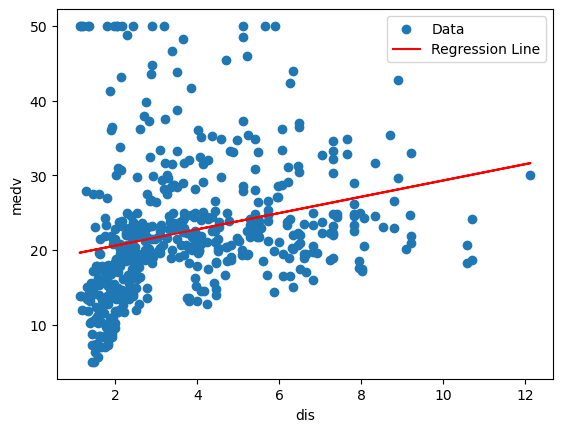

In [3]:
# Extract the variables
medv = Boston['medv'].values.reshape(-1, 1)
dis = Boston['dis'].values.reshape(-1, 1)

# Plot data
plt.scatter(dis, medv, label='Data')
plt.xlabel('dis')
plt.ylabel('medv')

# Fit a linear regression model
lm = LinearRegression()
lm.fit(dis, medv)

# Plot the regression line
plt.plot(dis, lm.predict(dis), color='red', label='Regression Line')

# Add labels and legend
plt.xlabel('dis')
plt.ylabel('medv')
plt.legend()

# Show the plot
plt.show()


Consider the variables plotted above. In the context of the `Boston` dataset:

_(iii)_ What is the (implied) null hypothesis? What is the (implied) alternative hypothesis?

**My Answer:** In the context of the Boston dataset the nul hypothesis is that weighted mean of distances to five Boston employment centres doesn't have any affect on median value of owner-occupied homes. The alternative hypotesis accepts that there is a relationship between weighted mean of distances and median value of homes. 

_(iv)_ Now, let’s fit a simple regression model, using the general syntax `sm.OLS()` and `model.fit()`. As above, use `medv` as the response variable Y, and `dis` as the predictor variable X. (Hint: use the syntax `sm.add_constant` with the appropriate argument).

In [17]:
# Add your code here
X = sm.add_constant(Boston['dis'])
y = Boston['medv']

model = sm.OLS(y, X)
predictions = model.fit()

predictions.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Fri, 31 May 2024   Prob (F-statistic):           1.21e-08
Time:                        10:42:44   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
dis            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Review your model output to answer the following questions (Hint: use the `summary` and `conf_int` functions):    
_(v)_ What are the _coefficient estimates_ for $B_0$ (intercept) and $B_1$ (slope)?  

**My Answer:** Intercept = 18.390088, slope =  1.091613.

_(vi)_ What are the _standard errors_ for $B_0$ and $B_1$?  

**My Answer:** Standard error for B_0 is 0.817389, for B_1 = 0.188378.

_(vii)_ What are the _confidence intervals_ for $B_0$ and $B_1$?  

**My Answer:** Confidence interval from 16.784179 to 19.995997 for B_0 and from 0.721509 to 1.461717 for B_1.


In [22]:
# Your answer here
#To retrieve coefficient estimates B_0 and B_1. This gives us intercept = 18.390088, slope =  1.091613: 
coeff = predictions.params
print(coeff)

#To retrieve standard errors for B_0 and B_1. This gives us standard error for B_0 is 0.817389, for B_1 = 0.188378: 
errors = predictions.bse
print(errors)

#To retrieve confidence intervals. This gives us confidence interval from 16.784179 to 19.995997 for B_0 and from 0.721509 to 1.461717 for B_1: 
conf_int = predictions.conf_int()
print(conf_int)

const    18.390088
dis       1.091613
dtype: float64
const    0.817389
dis      0.188378
dtype: float64
               0          1
const  16.784179  19.995997
dis     0.721509   1.461717



Now, let's interpret the model output.  
_(viii)_ Is the model a good fit? (Hint: review $R^2$)  

**My Answer:** The answer is No, the model is not a good fit. The R-squared value of 0.062 shows that only 6.2% of the variance of the dependent explained by a predictor. 

_(ix)_ Do we reject the (implied) null hypothesis? Why or why not? (Hint: review model $F$ statistic, $p$ value). 

**My Answer:** We do reject the null hypothesis. Because both F-statistic and p-values show significance of the model. 

In [23]:
# Your answer here
#(viii) To find the R-squared
r_squared = predictions.rsquared
print(r_squared)



0.062464372121782574


### Question 2: Multiple Linear Regression 

We'll continue to use the `Boston` dataset for this question.

_(i)_ Fit a multiple linear regression, with two predictor variables: $X_1$ is `dis`, and $X_2$ is `rm`. As before, keep `medv` as the response variable Y. (Hint: use the syntax `sm.add_constant` with the appropriate arguments).

In [5]:
# Add your code here
#Defining new variables: 
new_y = Boston['medv']
new_X = MS(['dis', 'rm']).fit_transform(Boston)

#Fitting a new multiple linear regression model:
new_model = sm.OLS(new_y, new_X)
new_results = new_model.fit()

#Summarizing the model:
new_results.summary()


/home/maryna/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/ISLP/models/columns.py:159: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if is_categorical[i]:


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.496
Model:                            OLS   Adj. R-squared:                  0.494
Method:                 Least Squares   F-statistic:                     247.0
Date:                Sat, 01 Jun 2024   Prob (F-statistic):           1.84e-75
Time:                        08:37:33   Log-Likelihood:                -1667.1
No. Observations:                 506   AIC:                             3340.
Df Residuals:                     503   BIC:                             3353.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    -34.6361      2.621    -13.212      0.000     -39.786     -29.486
dis            0.4888      0.141      3.459      0.001       0.211       0.767
rm             8.8014      0.424     20.780      0.000       7.969       9.634
==============================================================================
Omnibus:                      142.807   Durbin-Watson:                   0.684
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              844.520
Skew:                           1.090   Prob(JB):                    4.12e-184
Kurtosis:                       8.942   Cond. No.                         68.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

_(ii)_ In the context of the `Boston` dataset, state the null and alternative hypotheses.

**My Answer:** In the context of the 'Boston' dataset the null hyphothesis is that weighted mean of distances to five Boston employment centres and average number of rooms per dwelling don't have any affect on median value of owner-occupied homes. Alternative hypothesis is that either the mean of distances to employement centres or number of rooms or they both affect the median value of homes. 

_(iii)_ Review the model output, using `summary()`. Does it appear that both `dis` and `rm` are predictive of `medv`? How did you determine this?

**My Answer:** Yes, 'dis' and 'rm' are predictive of 'medv'. The low p-value for predictors shows significant relationships between them and 'medv'. Also the R-squared which is %49,6 shows the variance in dependant explained by this model. Coefficients of 'dis' and 'rm' are also can be indicators of level of relationships between variables. 

_(iv)_ We can use the inbuilt `sm.graphics.plot_regress_exog` function to generate helpful diagnostic plots (Hint: provide `plot_regress_exog` with the multiple regression model). Review the first generated plot, 'Residuals vs. Fitted'. Which observations are outliers? What impact might outliers have on our model?

**My Answer:** On the Residuals vs. Fitted plot we can see 'medv' outliers. Outliers can lead to inacurate predictions on new data because the model will be trained based on patterns drawn from data. 

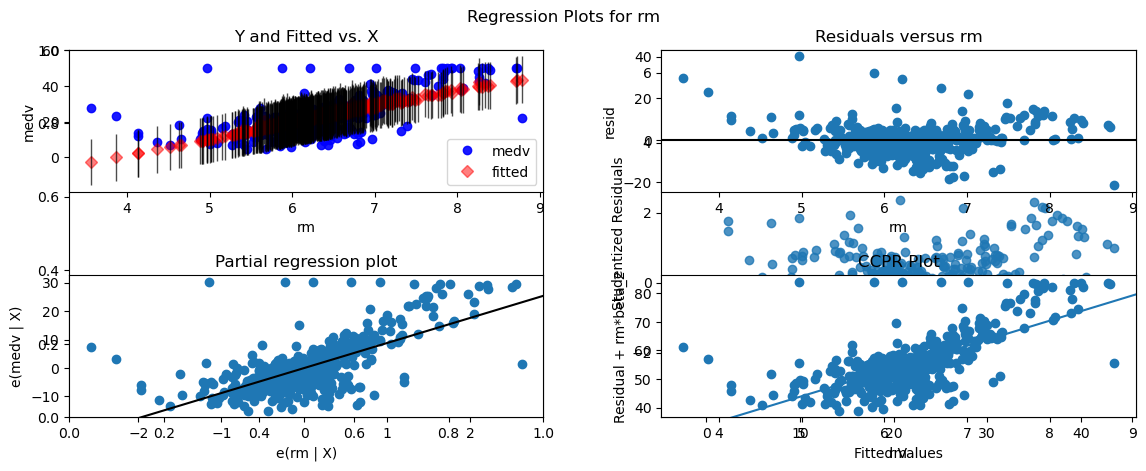

In [7]:
# Add your code here

# Plot the specified diagnostic plots
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Residuals vs. Fitted Values Plot
sm.graphics.plot_regress_exog(new_results, 'rm', fig=fig)

# Studentized Residuals vs. Fitted Values Plot
ax[1].scatter(new_results.fittedvalues, new_results.get_influence().resid_studentized_internal, alpha=0.8)
ax[1].set_xlabel('Fitted Values')
ax[1].set_ylabel('Studentized Residuals')

plt.show()

_(v)_ Fit a second model, this time including an interaction between the two predictor variables. Is there an interaction? (Hint: add a variable `x1 * x2` where `x1` and `x2` are the predictor variables). State an interpretation of the interaction, in the context of the `Boston` dataset, in one or two sentences.

**My Answer:** The interaction crim:age which has p-value of 0.097 is not significant to predict the medv. The p-value should be closer to 0, ideal <0,05.

In [12]:
# Add your code here

interaction_model = sm.OLS.from_formula('medv ~ crim * age', data = Boston)
interaction_result = interaction_model.fit()

# Print the summary of the regression
interaction_result.summary()




<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.221
Model:                            OLS   Adj. R-squared:                  0.216
Method:                 Least Squares   F-statistic:                     47.43
Date:                Sat, 01 Jun 2024   Prob (F-statistic):           5.33e-27
Time:                        09:51:24   Log-Likelihood:                -1777.1
No. Observations:                 506   AIC:                             3562.
Df Residuals:                     502   BIC:                             3579.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.0866      0.984     30.568      0.000      28.153      32.020
crim          -1.1601      0.513     -2.263      0.024      -2.168      -0.153
age           -0.0923      0.014     -6.663      0.000      -0.120      -0.065
crim:age       0.0089      0.005      1.661      0.097      -0.002       0.019
==============================================================================
Omnibus:                      189.710   Durbin-Watson:                   0.717
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              557.286
Skew:                           1.837   Prob(JB):                    9.70e-122
Kurtosis:                       6.596   Cond. No.                     2.43e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.43e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Criteria

|Criteria            |Complete           |Incomplete          |
|--------------------|---------------|--------------|
|Simple Linear Regression - Standard errors for $B_0$ and $B_1$|The standard errors are correct.|The standard errors are not correct.|
|Simple Linear Regression - Confidence intervals for $B_0$ and $B_1$|The confidence intervals are correct.|The confidence intervals are not correct.|
|Multiple Linear Regression - Null and alternative hypotheses|The relationship for both hypotheses has been correctly identified.|The relationship for both hypotheses has been incorrectly identified.|
|Multiple Linear Regression - Interpretation of the interaction|The interaction has been correctly identified.|The interaction has been incorrectly identified.|

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Note:

If you like, you may collaborate with others in the cohort. If you choose to do so, please indicate with whom you have worked with in your pull request by tagging their GitHub username. Separate submissions are required.

### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-1`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_1.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/applying_statistical_concepts/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-3-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.
